___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [4]:
df.head()

# the data has a lot of range so probably need to standardize

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

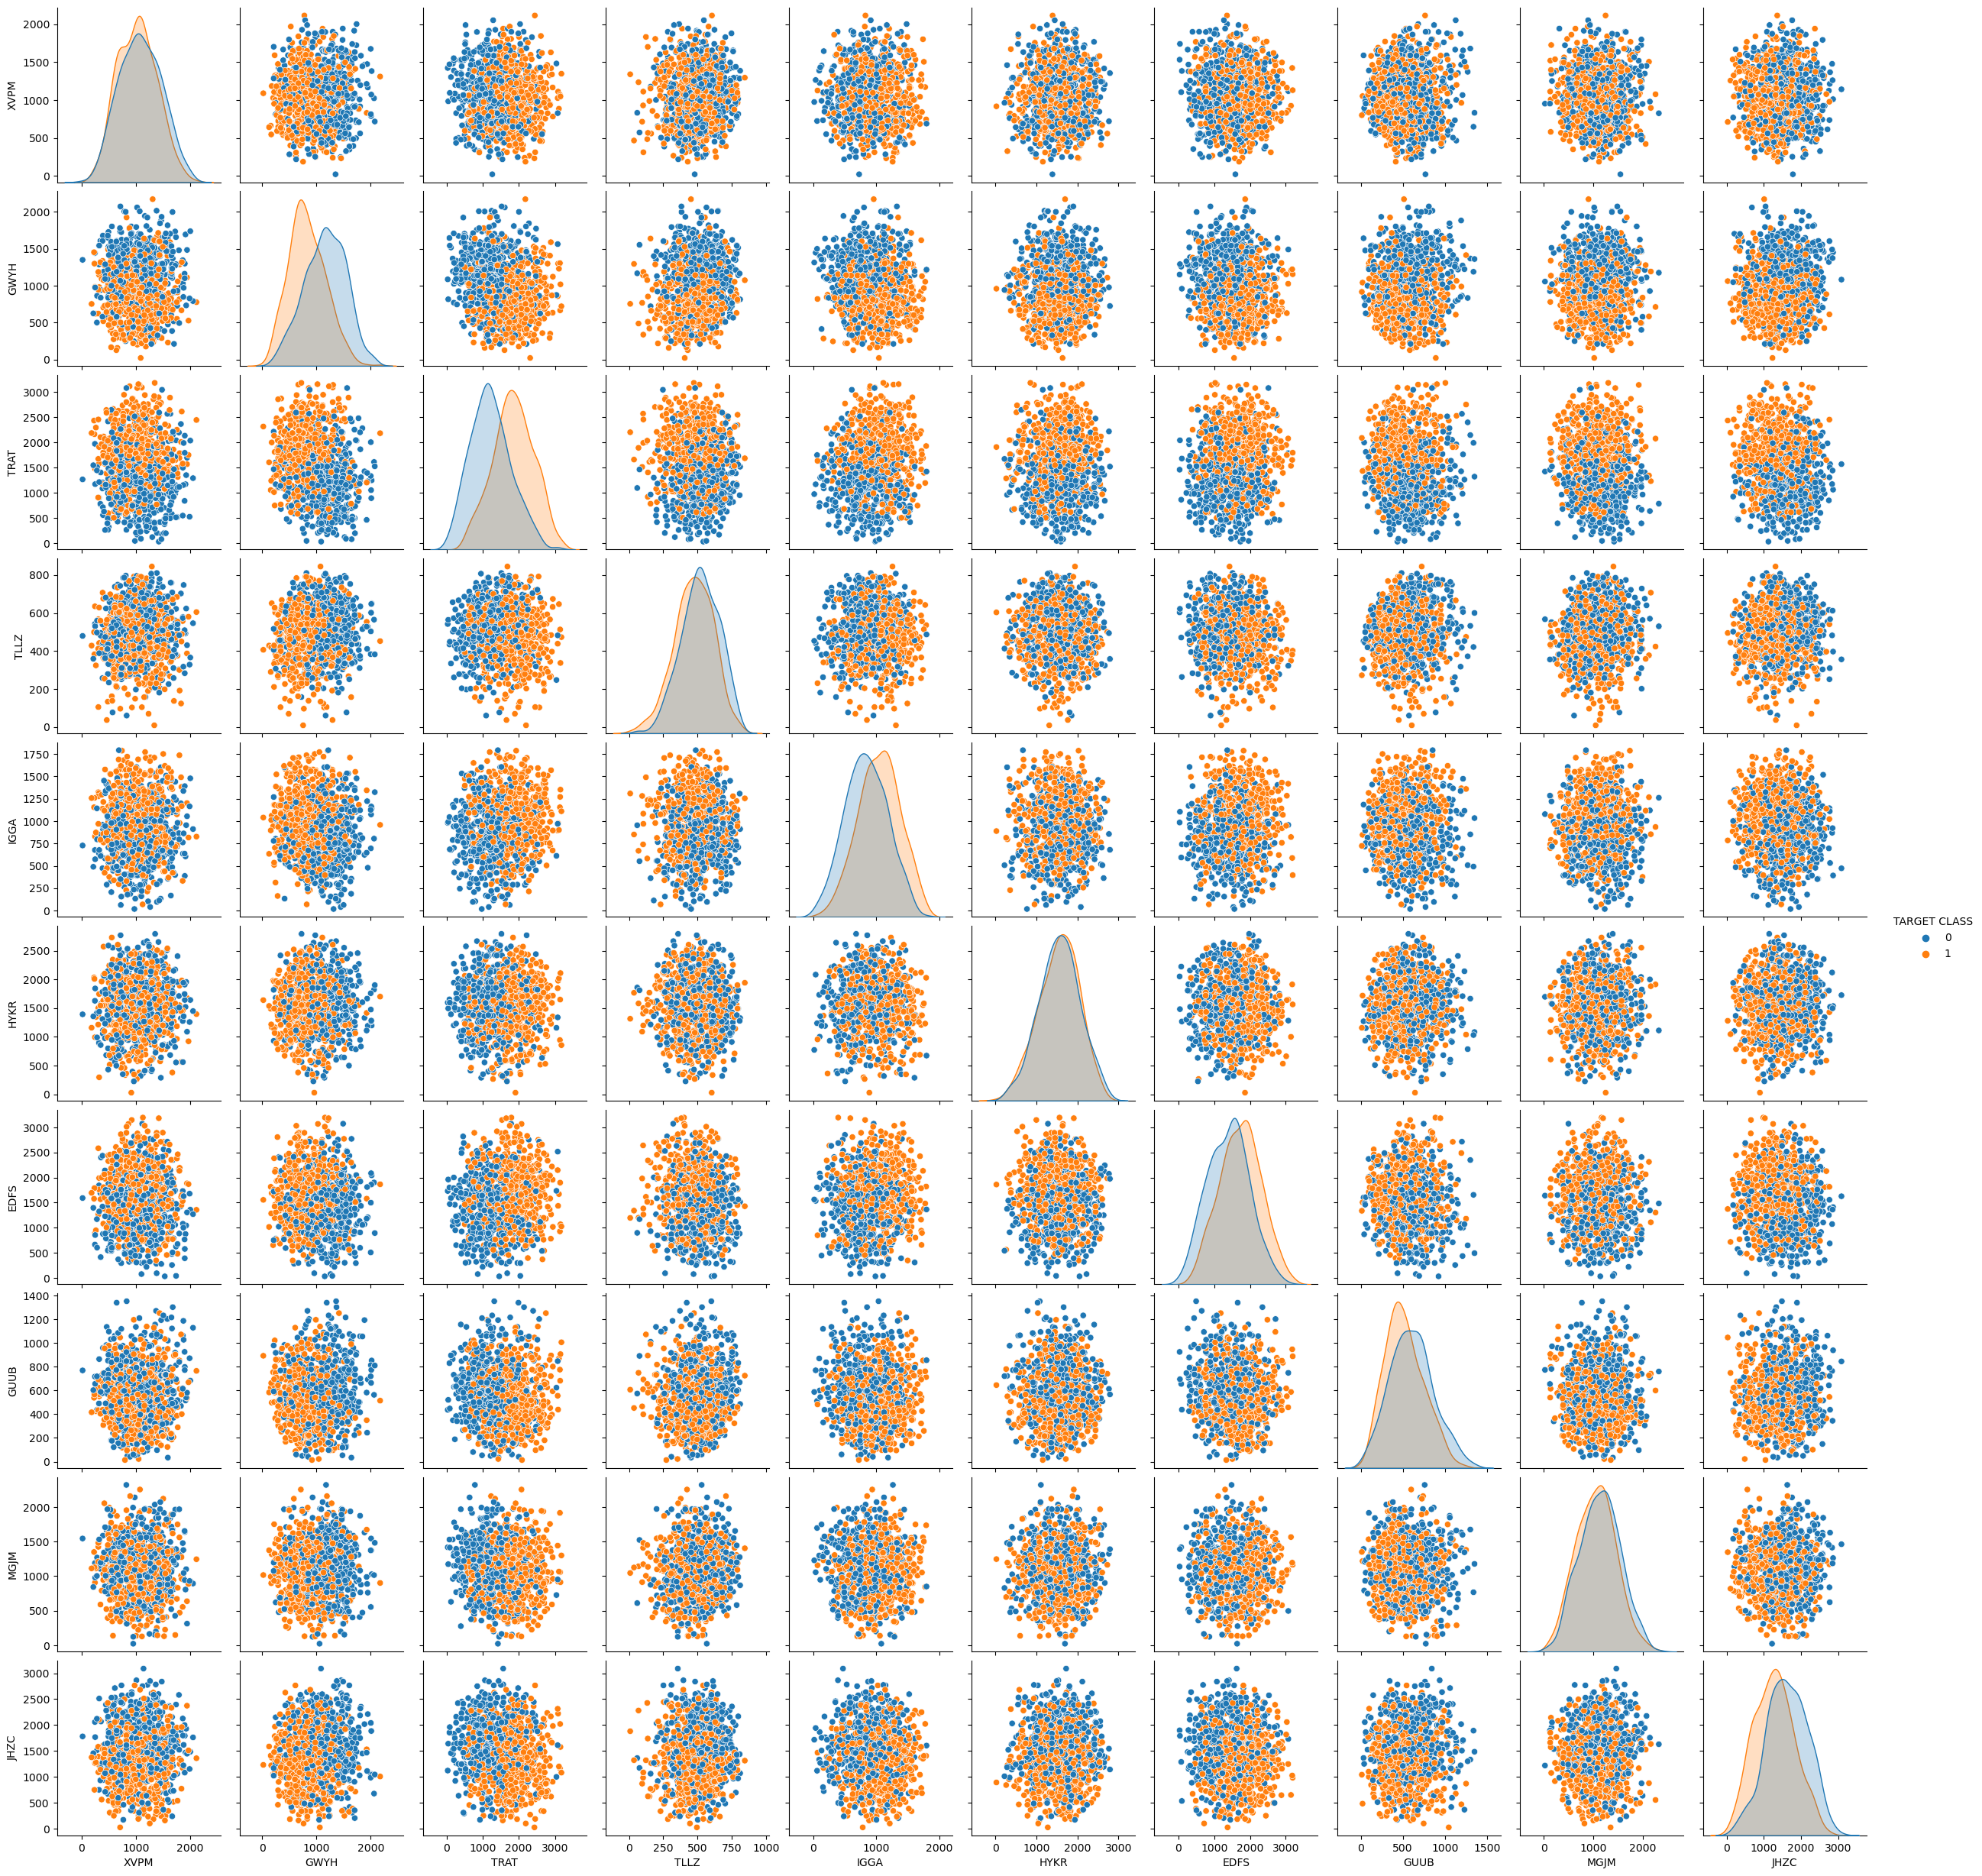

In [118]:
sns.pairplot(df,hue= 'TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [12]:
from sklearn.preprocessing import StandardScaler

** Create a StandardScaler() object called scaler.**

In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

** Fit scaler to the features.**

In [19]:
# fit the scaler to features, and adjust them so they have consistent scale and distribution 

scaler.fit(df.drop('TARGET CLASS',axis=1))

# just want to pass in the features not the entire data frame nor do we want to standardize the target class 

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [20]:
# transform these features into the scaled version of these (basically ".transform" is like a manufacture for variables)

# but we still just want to pass in only the features

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [126]:
df_scaled_features = pd.DataFrame(scaled_features)
df_scaled_features.head(3)

# there are no columns, so need to add columns 

0         1         2         3         4         5         6  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   

          7         8         9  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811

In [22]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [27]:
df.columns[:-1]

# this is not happening inplace

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

In [125]:
df_scaled_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled_features.head(3)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [32]:
from sklearn.model_selection import train_test_split

In [40]:
X = df_scaled_features # pass in the scaled features dataframe so it can predict using scaled down variables 
y = df['TARGET CLASS'] # "y" is our target, so we want to pass in what it thinks our 'TARGET CLASS' values are

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [129]:
KNN_instance = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [133]:
KNN_instance.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [134]:
predictions = KNN_instance.predict(X_test)
predictions

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], d

** Create a confusion matrix and classification report.**

In [135]:
from sklearn.metrics import confusion_matrix,classification_report

In [136]:
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 41 107]]


In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [53]:
error_rate = []

for i in range (1,51): # the range should never be smaller than the sample size or will throw error 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))
print(error_rate)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

[0.28, 0.29, 0.21666666666666667, 0.22, 0.20666666666666667, 0.21, 0.18333333333333332, 0.19, 0.19, 0.17666666666666667, 0.18333333333333332, 0.18333333333333332, 0.18333333333333332, 0.18, 0.18, 0.18, 0.17, 0.17333333333333334, 0.17666666666666667, 0.18333333333333332, 0.17666666666666667, 0.18333333333333332, 0.16666666666666666, 0.18, 0.16666666666666666, 0.17, 0.16666666666666666, 0.17333333333333334, 0.16666666666666666, 0.17333333333333334, 0.16, 0.16666666666666666, 0.17333333333333334, 0.17333333333333334, 0.17, 0.16666666666666666, 0.16, 0.16333333333333333, 0.16, 0.17, 0.16666666666666666, 0.16666666666666666, 0.16333333333333333, 0.17333333333333334, 0.16666666666666666, 0.16666666666666666, 0.17, 0.16666666666666666, 0.17333333333333334, 0.16666666666666666]


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

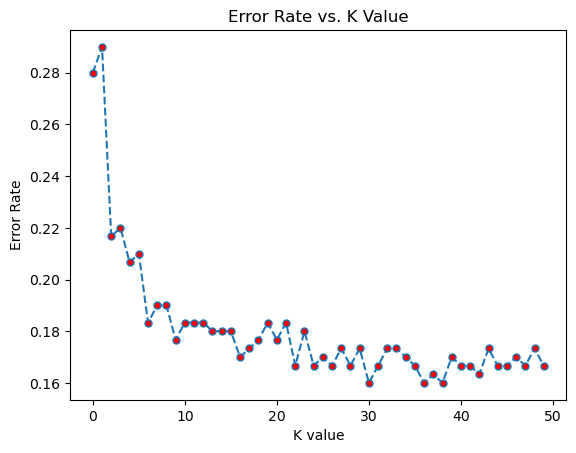

In [61]:
plt.plot(error_rate, linestyle='dashed',marker='o',markerfacecolor='red',markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [63]:
K_is_30 = KNeighborsClassifier(n_neighbors=30)
K_is_30.fit(X_train,y_train)
prediction_at_30 = K_is_30.predict(X_test)


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [68]:
print("Where K=30")
print(classification_report(y_test,prediction_at_30))
print('\n')
print(confusion_matrix(y_test,prediction_at_30))

# FOR CONFUSION MATRIX ALWAYS PASS IN "y_test" as the first argument and prediction as SECOND

Where K=30
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



[[124  28]
 [ 24 124]]


# Just redoing project for familiarity

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [70]:
dataframe = pd.read_csv('KNN_Project_Data')
dataframe.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

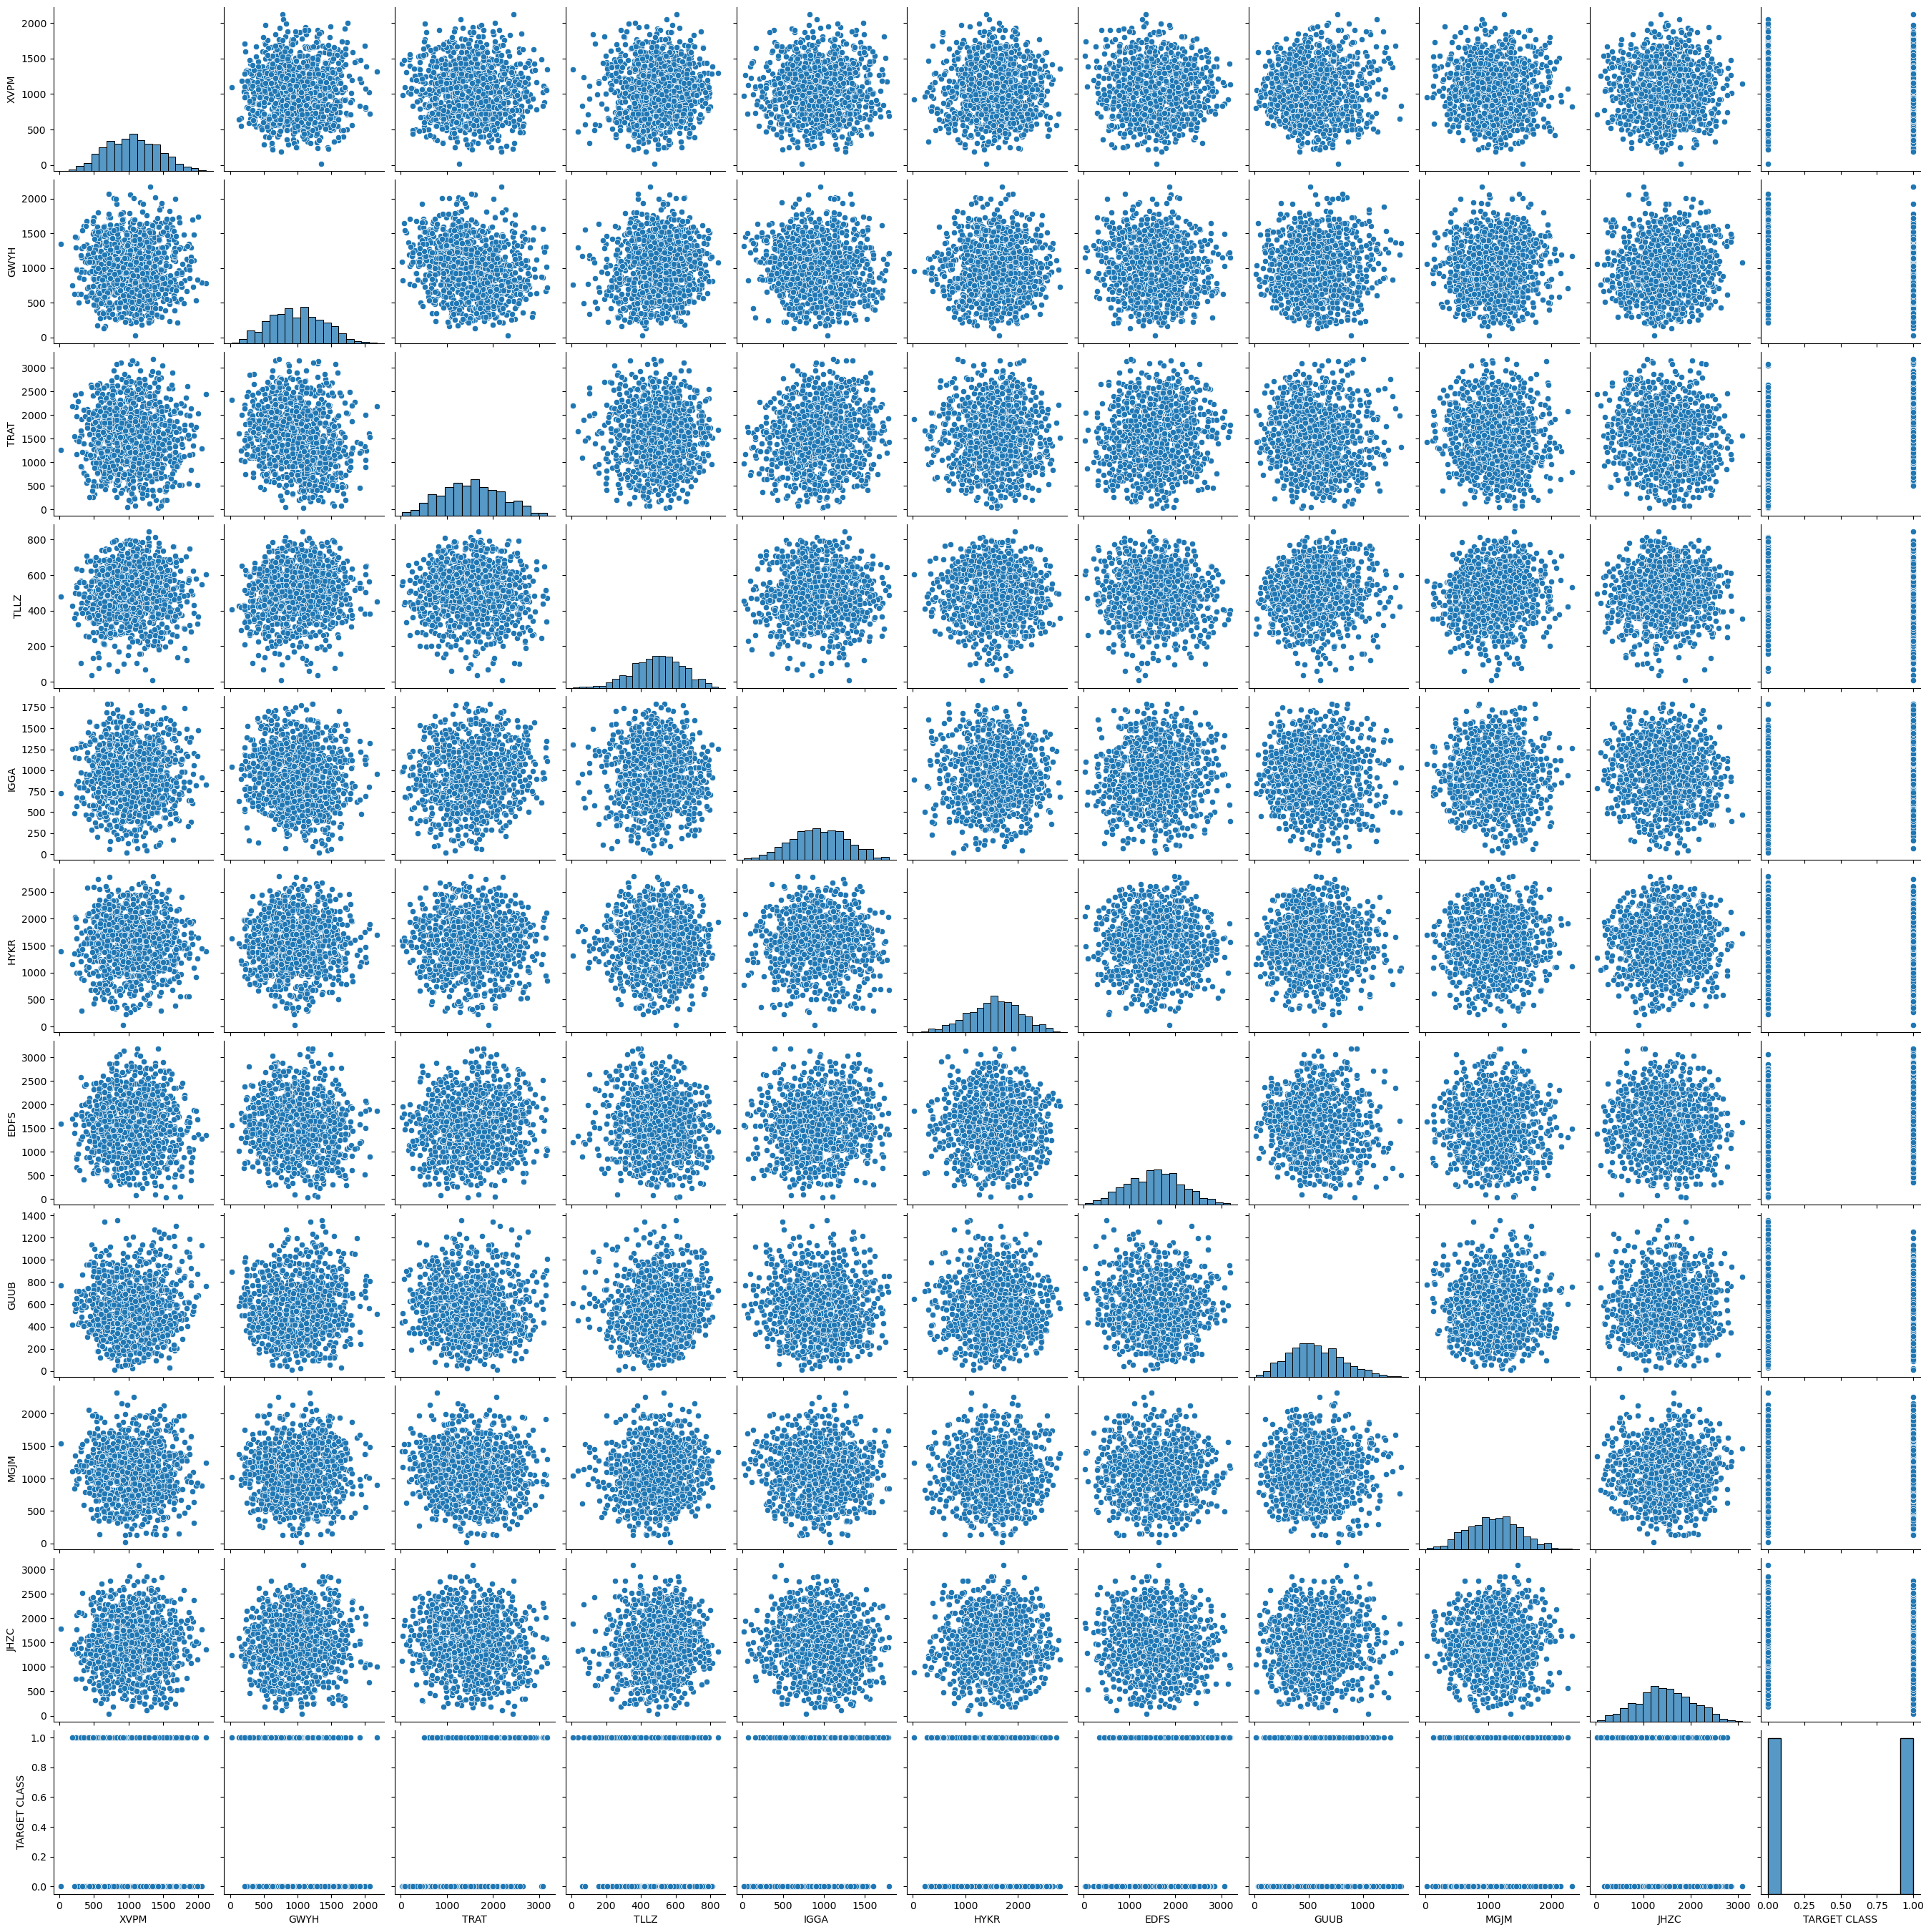

In [71]:
sns.pairplot(dataframe)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [89]:
scaled_features = scaler.transform(dataframe.drop('TARGET CLASS',axis=1))
feature_dataframe = pd.DataFrame(scaled_features,columns=dataframe.columns[:-1])
feature_dataframe.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [96]:
from sklearn.model_selection import train_test_split

X = feature_dataframe # this is feature dataframe that is scaled down already
y = dataframe['TARGET CLASS'] # original dataframe's Target Class (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# formula is X X, y y for train test split

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [100]:
y_predictions = knn_1.predict(X_test)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [101]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_predictions))
print(confusion_matrix(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300

[[109  43]
 [ 41 107]]


In [102]:
error_rate_datapoints = []

for i in range (1,61):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    predictions_i = knn_i.predict(X_test)
    error_rate_datapoints.append(np.mean(predictions_i != y_test))
    
print(error_rate_datapoints)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

[0.28, 0.29, 0.21666666666666667, 0.22, 0.20666666666666667, 0.21, 0.18333333333333332, 0.19, 0.19, 0.17666666666666667, 0.18333333333333332, 0.18333333333333332, 0.18333333333333332, 0.18, 0.18, 0.18, 0.17, 0.17333333333333334, 0.17666666666666667, 0.18333333333333332, 0.17666666666666667, 0.18333333333333332, 0.16666666666666666, 0.18, 0.16666666666666666, 0.17, 0.16666666666666666, 0.17333333333333334, 0.16666666666666666, 0.17333333333333334, 0.16, 0.16666666666666666, 0.17333333333333334, 0.17333333333333334, 0.17, 0.16666666666666666, 0.16, 0.16333333333333333, 0.16, 0.17, 0.16666666666666666, 0.16666666666666666, 0.16333333333333333, 0.17333333333333334, 0.16666666666666666, 0.16666666666666666, 0.17, 0.16666666666666666, 0.17333333333333334, 0.16666666666666666, 0.16333333333333333, 0.16333333333333333, 0.16, 0.16, 0.16333333333333333, 0.17333333333333334, 0.16666666666666666, 0.17, 0.17, 0.17333333333333334]


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Text(0, 0.5, 'Error Rate')

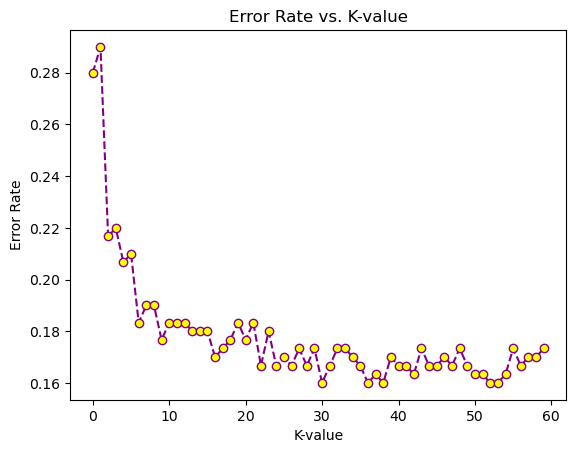

In [111]:
plt.plot(error_rate_datapoints, marker='o',linestyle='dashed',color='purple',markerfacecolor='yellow')
plt.title('Error Rate vs. K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')

In [115]:
knn_30 = KNeighborsClassifier(n_neighbors=30)
knn_30.fit(X_train,y_train)
predictions_30 = knn_30.predict(X_test)

C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [139]:
print('Where K=30')
print(classification_report(y_test,predictions_30))
print('\n')
print(confusion_matrix(y_test,predictions_30))

Where K=30
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



[[124  28]
 [ 24 124]]


In [138]:
knn_55 = KNeighborsClassifier(n_neighbors=55)
knn_55.fit(X_train,y_train)
predictions_55 = knn_55.predict(X_test)

print('Where K=55')
print(classification_report(y_test,predictions_30))
print('\n')
print(confusion_matrix(y_test,predictions_30))

Where K=55
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



[[124  28]
 [ 24 124]]


C:\Users\raiu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
